In [2]:
import sys
sys.path.append('../')
import functions
exec(open('./functions.py').read())


C:\Anaconda\envs\uni\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
... OK (Got response in 0.44 seconds)
Writing emoji data to C:\Users\home\.demoji\codes.json ...
... OK
[nltk_data] Downloading package stopwords to
[nltk_data]     

In [3]:
#load labelled data (generated in file 2.preprocessing)
data = pickle.load(open('data_n_models/eng_df_labelled.pkl', "rb"))
data.columns

Index(['index', 'user_id', 'user_statuses', 'name', 'tweet', 'retweets',
       'location', 'created', 'followers', 'is_user_verified',
       'favorite_count', 'in_reply_to_status_id', 'keyword', 'language',
       'clean', 'clean_vader', 'compound', 'lem', 'lemma'],
      dtype='object')

# Labelling bot related tweets

After the observations of the dataset, it was noticed that there are accounts that offer special scripts to buy goods on zalando as well as tweets by users of such scripts. Since this data is not related to the goal of our project we decided to filter them out. 

It is decided that if a user name contains 'bot', 'bot_' or 'script' it is a bot tweet.
And if a tweet contains 'script','bot','bots, 'bot_', 'cook','cop' it is a bit tweet

In [4]:
def classify_bots(df):
    #collect all the account names related to bots and scripts
    names = []
    pat = r'(bot\s|script|bot_)'
    for name in data.name.unique():
        match = re.findall(pat, name, re.IGNORECASE) 
        if len(match) > 0:
            names.append(name)
    #look for a key words to identify a tweet related to bots and scripts
    pattern = r"(script|bot\s|bots\s|bot_|cook|cop^e)"
    df['bot'] = False
    for i, row in df.iterrows():
        match = re.findall(pattern, row.tweet, re.IGNORECASE) 
        if len(match) > 0 or row.isin(names)['name'] == True:
            df['bot'].loc[i] = True
    return df

In [6]:
#apply the function
bot_df = classify_bots(data)

4% of english tweets were classified as bots

In [7]:
t = bot_df.bot.value_counts()
print(t)
t.loc[True] / (t.loc[False] + t.loc[True])

False    61741
True      2691
Name: bot, dtype: int64


0.04176496150980879

the majority of english speaking bots are about asos

          tweet
keyword        
@zalando      2
asos       2011
bohoo         2
boohoo      106
zalando     570


<AxesSubplot:xlabel='keyword'>

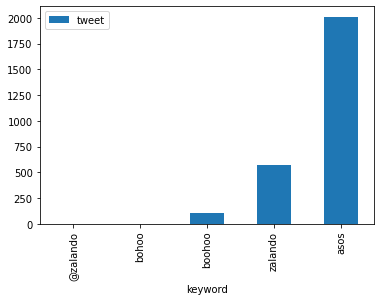

In [130]:
print(bot_df[['keyword','tweet']][bot_df.bot == True].groupby(['keyword']).count())
bot_df[['keyword','tweet']][bot_df.bot == True].groupby(['keyword']).count().sort_values(by='tweet').plot.bar()

English no-bot tweets is just 3% about Zalando

          tweet
keyword        
@zalando    294
asos      34683
bohoo       166
boohoo    24746
zalando    1852


<AxesSubplot:xlabel='keyword'>

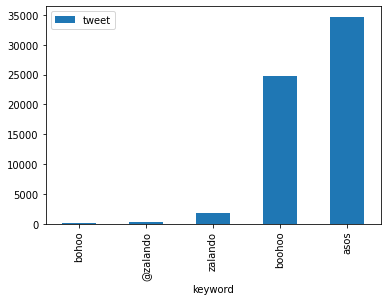

In [93]:
print(bot_df[['keyword','tweet']][bot_df.bot == False].groupby(['keyword']).count())
bot_df[['keyword','tweet']][bot_df.bot == False].groupby(['keyword']).count().sort_values(by='tweet').plot.bar()

In [137]:
#testing results by checking random 10 tweets
sample = bot_df[bot_df.bot == True].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

56161 iembot_ggw JORDAN ASOS MT Mar 26 Climate: High: 48 Low: 19 Precip: 0.01 Snow: Missing https://t.co/ShcKfeY86m https://t.co/fASmc5Jt7i
94609 iembot_byz At 6:15 PM MDT, 3 WNW Miles City [Custer Co, MT] ASOS reports NON-TSTM WND GST of M53 MPH https://t.co/sVsKcdbjnp
54380 caos_onelove good shock drop today (psg all bae) with @theGaneshBot and top monitor of @OneNotify 
(@ill_p1c king of zalando from day 1) https://t.co/BURsxHsRFe
18910 iembot_maf GUADALUPE PASS AMOS,TX (GDP) ASOS reports gust of 64 knots (73.7 mph) from W @ 0800Z -- KGDP 150851Z AUTO 25037G47KT 10SM CLR 06/M08 A2989 RMK AO2 PK WND 27064/0800 SLP091 T00561083 51009 $
41394 STARLABScripts Zalando ✅

Members are YET to receive big Zalando UPDATE, but we are still cooking HARD! 😈🚀
100434 iembot_lox LA / WHITEMAN,CA (WHP) ASOS reports gust of 51 knots (58.7 mph) from NNW @ 2050Z -- KWHP 182050Z 34024G51KT 10SM SKC 27/M15 A3006
18470 iembot_gyx Mount Washington,NH (MWN) ASOS reports gust of 70 knots (80.6 mph) from NW @ 

# print 10 top likes about Zalando

issues:

1. lots of duplicates it text, but not 1-1

2. some tweets do not contain Zalando

3. still some bots 
"generate over 1000 zalando accounts in less then 4 hours!"

In [132]:
nobots = bot_df[bot_df.bot == False]

for i, value in nobots[nobots['keyword'] == 'zalando'].sort_values(by = 'compound', ascending=False)[50:66].tweet.iteritems():
    print(i, value)
    print('________________')

6536 @Irina_Vukolova
😃 ...And a new set of clothing, My love. To be combined with this afternoon's clothes. 
🤗😘❤ℐℓ٥ﻻﻉ√٥υ❤🥰😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘🥰💖💓💕💎💍🎸🎶🌹🌹🌹
https://t.co/BCs8NqOvHk https://t.co/3GW1IdWuLz
________________
28067 @Irina_Vukolova
😃 ... And a new set of dresses, My love. To be combined with this afternoon's clothes. 
🤗😘❤ℐℓ٥ﻻﻉ√٥υ❤🥰😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘🥰💖💓💕💎💍🎸🎶🌹🌹🌹
https://t.co/ajufCwP1o1 https://t.co/uC5fFhozj2
________________
13493 @Irina_Vukolova
😃 And a new set of clothing, My love. To be combined with this afternoon's clothes. 
🤗😘❤ℐℓ٥ﻻﻉ√٥υ❤🥰😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘🥰💖💗💓💕💎💍🎸🎶🌹🌹🌹
https://t.co/LPIY1ITCDm https://t.co/FbLM8TDNHR
________________
6751 @Irina_Vukolova
😃 And a new set of clothing, My love. To be combined with this morning's clothes. 
🤗😘❤ℐℓ٥ﻻﻉ√٥υ❤🥰😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙🥰💖💓💕💎💍🎸🎶🌹🌹🌹
https://t.co/esx0gGQb93 https://t.co/YaZUnoGRY1
________________

# print top 10 negative tweets about zalando

issues:

1. is it bot?
__________
73907 2x 39 today on Zalando, sadly my accounts are still bad despite my best efforts 😭

Thanks @FlareAIO @flash_proxy https://t.co/enSImFj0eH



In [129]:
for i, value in nobots[nobots['keyword'] == 'zalando'].sort_values(by = 'compound', ascending=True)[:10].tweet.iteritems():
    print(i, value)
    print('________________')

28119 @d0h0k1 @anchor_protocol WTF bro. This blockchain shit doesn't work. After this, I'm quitting my crypto job and applying to Zalando and Deliveroo. Fuck crypto!
________________
17230 I bought two more pairs of shoes this morning, from Zalando Lounge, for summer. Only with the new Covid numbers and slow vaccination we'll probably all sit at home. And cry. I hate the stupid selfishness of people.
________________
73907 2x 39 today on Zalando, sadly my accounts are still bad despite my best efforts 😭

Thanks @FlareAIO @flash_proxy https://t.co/enSImFj0eH
________________
3109 @glittery_crazen it's on zalando i think, tried to buy but fuck it it's expensive asf and i'm not rich enough
________________
106307 @thunder_io They just banned my zalando acc, I’m sad asf why always bad things happen.
________________
106490 I hate zalando they cancelled my order ffs
________________
60987 proc zalando rika leginam puncochy bitch im gonna kill you
________________
60981 @sicko218 After zal k